### 다중공선성(Multicolinearity)

- 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우
- 변수들이 서로 독립이 아니라 높은 선형관계가 존재할 때 발생
- 상관분석 결과에 대해 상관계수 크기가 1에 가까운 경우 발생
- 서로 종속적인 변수로 모델을 학습시키면 과적합(over-fitting)이 발생하여 모델 성능 저하
- 해결 방법
    - VIF 기반 변수 선택법으로 의존적인 변수 삭제
    - PCA(principal component analysis) 방법으로 의존적인 성분 삭제

#### 1. VIF(Variance Inflation Factor : 분산팽창요인)
- 계산 공식 : 1 / (1 - R^2)
- 하나의 변수를 종속변수로, 나머지 변수를 독립변수로 적용한 다항회귀분석 수행
    - 회귀계수(결정계수)를 이용하여 VIF 값 도출
    - 종속변수로 사용된 변수가 다른 변수들에게 종속적일 수록 VIF 값이 증가
    - VIF 값이 5-10 사이 일 때 다중공선성이 존재
- 함수
    - statsmodels.stats.outliers_influence > variance_inflation_factor

In [45]:
# pandas, numpy 라이브러리 가져오기
import pandas as pd
import numpy as np

In [2]:
# VIF 실습을 위한 데이터
df = pd.read_csv('boston_vif.csv')
df.head()

,Intercept,scale(CRIM),scale(I(CRIM ** 2)),scale(ZN),scale(I(ZN ** 2)),scale(INDUS),scale(NOX),scale(RM),scale(AGE),scale(np.log(DIS)),scale(RAD),scale(TAX),scale(np.log(PTRATIO)),scale(B),scale(np.log(LSTAT)),CHAS,MEDV
0,1.0,-0.419782,-0.169474,0.284830,-0.191030,-1.287909,-0.144217,0.413672,-0.120013,0.409104,-0.982843,-0.666608,-1.443977,0.441052,-1.275260,0.0,24.0
1,1.0,-0.417339,-0.169473,-0.487722,-0.368889,-0.593381,-0.740262,0.194274,0.367166,0.769562,-0.867883,-0.987329,-0.230278,0.441052,-0.263711,0.0,21.6
2,1.0,-0.417342,-0.169473,-0.487722,-0.368889,-0.593381,-0.740262,1.282714,-0.265812,0.769562,-0.867883,-0.987329,-0.230278,0.396427,-1.627858,0.0,34.7
3,1.0,-0.416750,-0.169472,-0.487722,-0.368889,-1.306878,-0.835284,1.016303,-0.809889,1.139194,-0.752922,-1.106115,0.165279,0.416163,-2.153192,0.0,33.4
4,1.0,-0.412482,-0.169465,-0.487722,-0.368889,-1.306878,-0.835284,1.228577,-0.511180,1.139194,-0.752922,-1.106115,0.165279,0.441052,-1.162114,0.0,36.2


In [3]:
# X = df.drop('MEDV', axis=1)
X = df.loc[:, df.columns != 'MEDV'].copy()

In [6]:
# 라이브러리 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
# VIF 결과 저장을 위한 데이터프레임
vif = pd.DataFrame()

In [10]:
X.shape

(456, 16)

In [9]:
X.values

array([[ 1.        , -0.41978194, -0.1694739 , ...,  0.44105193,
        -1.27526026,  0.        ],
       [ 1.        , -0.41733926, -0.16947252, ...,  0.44105193,
        -0.26371064,  0.        ],
       [ 1.        , -0.41734159, -0.16947252, ...,  0.39642699,
        -1.62785808,  0.        ],
       ...,
       [ 1.        , -0.4152492 , -0.16946998, ...,  0.44105193,
        -0.27468219,  0.        ],
       [ 1.        , -0.41344658, -0.16946678, ...,  0.44105193,
        -1.06793936,  0.        ],
       [ 1.        , -0.40776407, -0.16945055, ...,  0.4032249 ,
        -0.83665988,  0.        ]])

In [13]:
variance_inflation_factor(X.values, 15)

1.0616239649518593

In [18]:
vif

""


In [19]:
# 데이터프레임에 컬럼명과 각 VIF 값 추가하기
vif['features'] = X.columns

In [ ]:
# 0 ~ 15
# 반복문의 결과가 리스트로 저장되는 코드
tmp = []
for i in range(16):
    tmp.append(variance_inflation_factor(X.values, i))

In [20]:
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(16)]

In [21]:
vif.head()

,features,vif
0,Intercept,1.478553
1,scale(CRIM),21.260182
2,scale(I(CRIM ** 2)),10.218588
3,scale(ZN),14.646056
4,scale(I(ZN ** 2)),11.751869


In [22]:
# VIF 값 기준으로 오름차순(공선성이 낮은순서로) 정렬
vif.sort_values('vif')

,features,vif
15,CHAS,1.061624
13,scale(B),1.338325
0,Intercept,1.478553
12,scale(np.log(PTRATIO)),1.780320
7,scale(RM),2.596496
8,scale(AGE),3.748931
5,scale(INDUS),3.807459
14,scale(np.log(LSTAT)),4.682812
6,scale(NOX),5.071802
9,scale(np.log(DIS)),5.215025


In [38]:
vif['vif']
vif.vif
vif.get('vif')

0      1.478553
1     21.260182
2     10.218588
3     14.646056
4     11.751869
5      3.807459
6      5.071802
7      2.596496
8      3.748931
9      5.215025
10    11.254736
11     9.107858
12     1.780320
13     1.338325
14     4.682812
15     1.061624
Name: vif, dtype: float64

In [33]:
# VIF 값이 5미만인 변수만 선택
cols = vif[vif['vif'] < 5].features.values

In [34]:
# 변수명 추출
cols

array(['Intercept', 'scale(INDUS)', 'scale(RM)', 'scale(AGE)',
       'scale(np.log(PTRATIO))', 'scale(B)', 'scale(np.log(LSTAT))',
       'CHAS'], dtype=object)

In [30]:
# 다중공선성을 제거한 입력변수 추출
final_X = X[cols].copy()

#### 2. PCA(Principal Component Analysis : 주성분 분석)

- 고차원의 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원의 데이터를 찾아내는 방법
- 새롭게 생성된 축 사이에는 유사도가 적은 변수 및 비율로 구성
- 단위의 크기에 따라 분산 비율이 높게 계산되기 때문에 정규화된 결과에 대해 PCA를 적용해야함
- 연속형 데이터에 대해서만 적용이 가능하므로 범주형 데이터를 제외하거나 인코딩을 통한 변환 필요
- 개념
    - 주성분 벡터
        - 전체 데이터의 분산에 대해 설명할 수 있는 새로운 축
        - 하나의 축에 대해 각 변수가 가지고 있는 가중치 값으로 기여도를 파악할 수 있음
        - 값에 대한 해석 : 0(아무 관련이 없음), 양수/음수(벡터에서의 방향), 값의 크기(기여도)
    - 설명 분산
- 함수
    - sklearn.decomposition > PCA
        - PCA(n_components = n) : 주성분 개수
        - fit() : 주성분 계수 추정
        - transform() : 주성분 변환 값 반환
        - fit_transform() : 주성분 계수 추정 및 변환 값 반환

In [46]:
# seaborn 라이브러리 불러오기
# 기본 iris 데이터셋 
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
# 두 개 이상 컬럼 제외하고 선택하기


,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
5,1.7,0.4,setosa
6,1.4,0.3,setosa
7,1.5,0.2,setosa
8,1.4,0.2,setosa
9,1.5,0.1,setosa


In [47]:
# X, y 데이터 분리
# 하나의 컬럼만 제외하고 선택하기 방법 
X = iris.drop('species', axis=1)
X.shape

(150, 4)

In [48]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [49]:
# 주성분 개수를 1개로 지정하여 적용 
# 입력변수의 차원을 4개에서 1개로 축소
# 사용하는 순서 : PCA 객체 생성(개수 지정) => fit/transform
pca1 = PCA(n_components=1)
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
# fitted_pca_obj.components_  => 주성분 계수
# 행(축/차인/새로운주성분) / 열(입력변수)
# 주성분 1개 => 하나의 축만 생성
# 입력변수 4개가 새로운 축(차원)에서 가지고 있는 분산에 기여하는 정도 / 방향
pca1.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]])

In [52]:
# fitted_pca_obj.explained_variance_ => 새로운 축이 전체 분산에서 차지하는 값
pca1.explained_variance_

array([4.22824171])

In [53]:
# fitted_pca_obj.explained_variance_ratio_ => 새로운 축이 전체 분산에서 차지하는 비율
pca1.explained_variance_ratio_

array([0.92461872])

In [54]:
# fit_transform 수행 결과
pca1_X = pca1.transform(X)

In [55]:
X.shape

(150, 4)

In [56]:
pca1_X.shape

(150, 1)

In [58]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [57]:
pca1_X

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654],
       [-2.28085963],
       [-2.82053775],
       [-2.62614497],
       [-2.88638273],
       [-2.6727558 ],
       [-2.50694709],
       [-2.61275523],
       [-2.78610927],
       [-3.22380374],
       [-2.64475039],
       [-2.38603903],
       [-2.62352788],
       [-2.64829671],
       [-2.19982032],
       [-2.5879864 ],
       [-2.31025622],
       [-2.54370523],
       [-3.21593942],
       [-2.30273318],
       [-2.35575405],
       [-2.50666891],
       [-2.46882007],
       [-2.56231991],
       [-2.63953472],
       [-2.63198939],
       [-2.58739848],
       [-2.4099325 ],
       [-2.64886233],
       [-2.59873675],
       [-2.63692688],
       [-2.86624165],
       [-2.62523805],
       [-2.80068412],
       [-2.98050204],
       [-2.59000631],
       [-2.77010243],
       [-2.84936871],
       [-2.99740655],
       [-2.40561449],
       [-2.20948924],
       [-2

In [59]:
# 주성분 개수를 2개로 지정하여 적용
pca2 = PCA(n_components=2)

In [60]:
pca2.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
# 주성분 벡터 
# 행(주성분,축), 열(입력변수)
pca2.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [62]:
# 설명 분산 확인
pca2.explained_variance_

array([4.22824171, 0.24267075])

In [64]:
# 설명 분산 비율 확인
pca2.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [65]:
# transform 결과 확인
pca2_X = pca2.transform(X)

In [66]:
pca2_X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [67]:
# (연습문제) 주성분 개수를 지정하지 않고 적용
# PCA(n_components=None(default))
pca = PCA()

In [68]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [71]:
# (연습문제) 설명분산 누적비율 연산
# np.cumsum()
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [72]:
np.cumsum(pca.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [73]:
# (연습문제) 설명분산 누적비율 시각화
s1 = pd.Series(np.cumsum(pca.explained_variance_ratio_))

In [75]:
s1.index = ['PC1', 'PC2', 'PC3', 'PC4']
s1

PC1    0.924619
PC2    0.977685
PC3    0.994788
PC4    1.000000
dtype: float64

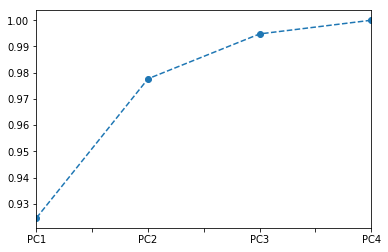

In [78]:
s1.plot(style='o--')

In [84]:
# (연습문제) 설명분산 누적비율이 97% 이상이 되는 차원 개수 구하기
s1[s1 >= 0.97]

PC2    0.977685
PC3    0.994788
PC4    1.000000
dtype: float64

In [87]:
# 축 개수 반영하기 1
# 누적기여율 기준으로 축 개수 확인 후
# 축 개수 지정하여 fit_transform
result = PCA(n_components=2).fit_transform(X)

In [88]:
result

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [85]:
# 축 개수 반영하기 2
# 최대 축 생성한 데이터에서 2개 축만 추출
pca_X = pca.transform(X)

In [89]:
tmp = pd.DataFrame(pca_X, columns=['pc1', 'pc2', 'pc3', 'pc4'])

In [92]:
result2 = tmp.iloc[:, :2].copy()

#### X 데이터에 대해 스케일링 적용한 버전

In [93]:
# StandardScaler 전처리(표준화)  =>  scale()
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()

In [96]:
scaled_X = scaler.fit_transform(X)

In [97]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [98]:
# scaler는 array 타입을 반환
scaled_X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [99]:
# (연습문제) 주성분 개수를 지정하지 않고 적용
pca = PCA()
pca.fit(scaled_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [100]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [101]:
# 누적기여율 계산 및 시각화
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [105]:
import matplotlib.pyplot as plt

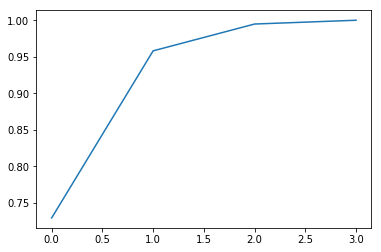

In [106]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# 해석